In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
DIOPTRIES = 100
F2 = 1 / DIOPTRIES

In [4]:
df1 = pd.read_csv('first_experiment.csv', delimiter=';')
df2 = pd.read_csv('second_experiment.csv', delimiter=';')
df = pd.concat([df1, df2], ignore_index=True)
df

,X,Y,S
0,7.5,21.0,33.0
1,7.5,22.0,34.0
2,7.5,24.0,37.0
3,7.5,26.0,38.8
4,7.5,23.0,36.0
5,7.5,21.0,32.0
6,6.5,26.5,39.0
7,6.5,28.0,43.0
8,6.5,27.5,45.0
9,6.5,24.0,38.0


In [5]:
# привидение к системе си:
df['X'] = df['X'].astype(float) / 100
df['Y'] = df['Y'].astype(float) / 100
df['S'] = df['S'].astype(float) / 100

Для первого эксперимента:

In [6]:
d1 = df['X'] 
r = df['Y'] - df['X']
f2 = df['S'] - df['Y']



In [7]:
d2 = F2 * f2 / (f2 - F2)
F1 = d1 * (r - d2) / (d1 + r - d2)
F1.head()

0    0.046747
1    0.048098
2    0.050455
3    0.052423
4    0.049335
dtype: float64

In [8]:
delta_X = 0.001   # погрешность X
delta_Y = 0.001   # погрешность Y
delta_S = 0.001   # погрешность S

In [9]:
delta_d2 = np.abs(F2 * f2 / (f2 - F2)**2) * delta_S + np.abs(F2 / (f2 - F2)) * delta_Y
delta_F1 = np.abs((r - d2) / (d1 + r - d2)) * delta_X + np.abs(d1 / (d1 + r - d2)) * (delta_Y + delta_X) + np.abs(d1 * (r - d2) / (d1 + r - d2)**2) * (delta_X + delta_Y + delta_d2)

df['F1'] = F1
df['delta_F1'] = delta_F1

print(df[['F1', 'delta_F1']])

          F1  delta_F1
0   0.046747  0.001891
1   0.048098  0.001862
2   0.050455  0.001806
3   0.052423  0.001759
4   0.049335  0.001831
5   0.046734  0.001896
6   0.048375  0.001671
7   0.049310  0.001635
8   0.049020  0.001640
9   0.046569  0.001722
10  0.044302  0.001675
11  0.045566  0.001628
12  0.043590  0.001697
13  0.044164  0.001541
14  0.045902  0.001519
15  0.041955  0.001743
16  0.041000  0.001773
17  0.038740  0.001843
18  0.039938  0.001805
19  0.042394  0.001730
20  0.044641  0.001661
21  0.045570  0.001626
22  0.040986  0.001780
23  0.039161  0.001991
24  0.041022  0.001945
25  0.042651  0.001908
26  0.046004  0.001831
27  0.047655  0.001786
28  0.049522  0.001737
29  0.050344  0.001715
30  0.046955  0.001715
31  0.044785  0.001785
32  0.042632  0.001848


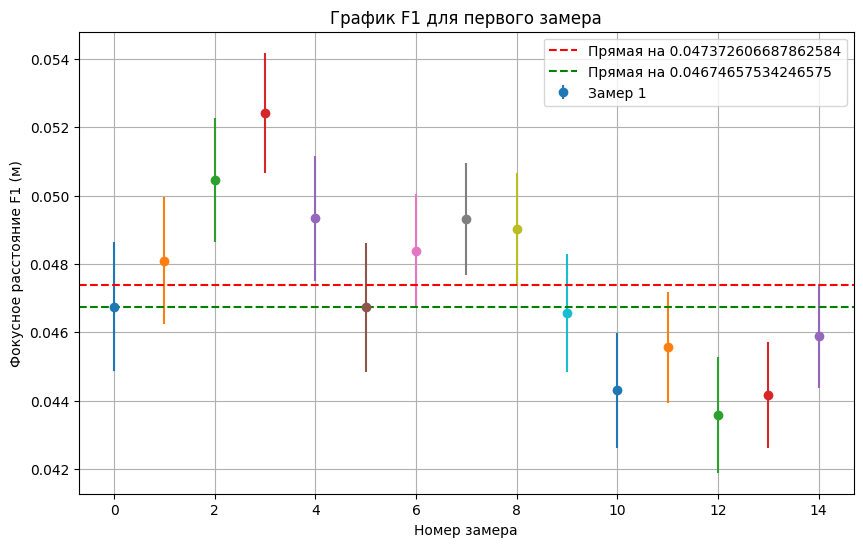

In [10]:
plt.figure(figsize=(10, 6))

for i in range(15):
    plt.errorbar(i, df['F1'][i], yerr=df['delta_F1'][i], fmt='o', label=f'Замер {i+1}' if i == 0 else "")

def draw_line(y_value, color):
    plt.axhline(y=y_value, color=color, linestyle='--', label=f'Прямая на {y_value}')

draw_line(np.mean(df['F1'][0:15]), 'r')
draw_line(np.median(df['F1'][0:15]), 'g')

plt.xlabel('Номер замера')
plt.ylabel('Фокусное расстояние F1 (м)')
plt.title('График F1 для первого замера')
plt.legend()
plt.grid(True)
plt.show()

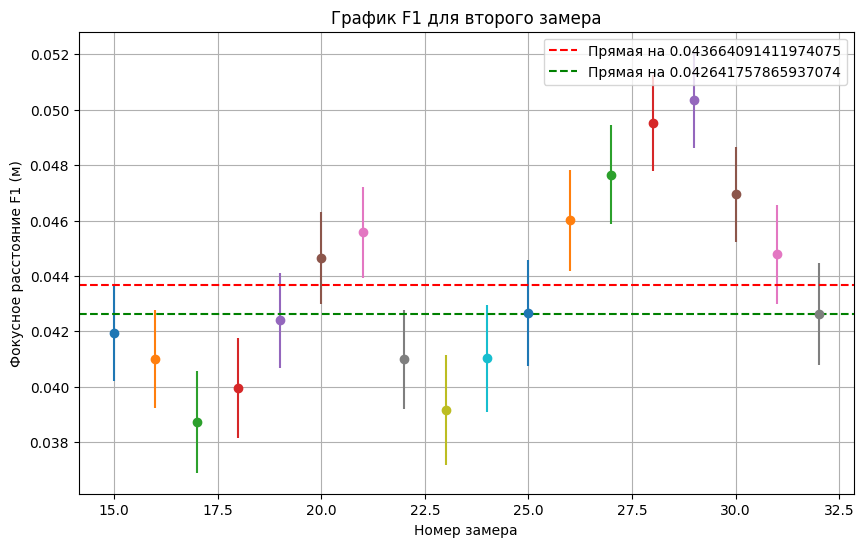

In [11]:
plt.figure(figsize=(10, 6))

for i in range(15, len(df)):
    plt.errorbar(i, df['F1'][i], yerr=df['delta_F1'][i], fmt='o', label=f'Замер {i+1}' if i == 0 else "")

def draw_line(y_value, color):
    plt.axhline(y=y_value, color=color, linestyle='--', label=f'Прямая на {y_value}')

draw_line(np.mean(df['F1'][15:len(df)]), 'r')
draw_line(np.median(df['F1'][15:len(df)]), 'g')

plt.xlabel('Номер замера')
plt.ylabel('Фокусное расстояние F1 (м)')
plt.title('График F1 для второго замера')
plt.legend()
plt.grid(True)
plt.show()

print()

Результаты для первых 15 замеров:
Среднее: 0.0474 м, Медиана: 0.0467 м, Стандартное отклонение: 0.0024 м

Результаты для оставшихся замеров:
Среднее: 0.0437 м, Медиана: 0.0426 м, Стандартное отклонение: 0.0034 м


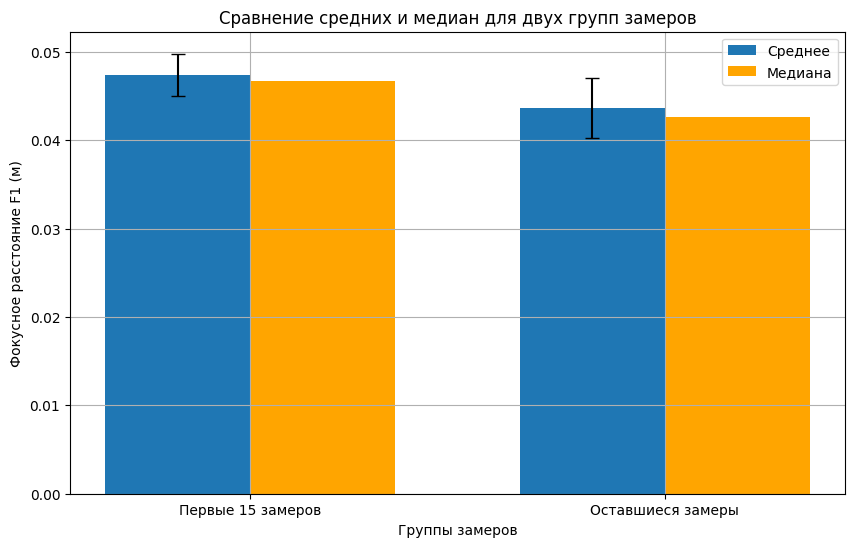


Разница между средними значениями: 0.0037 м
Разница между медианами: 0.0041 м


In [ ]:
group1 = df['F1'][0:15]  
group2 = df['F1'][15:len(df)] 


mean_group1 = np.mean(group1)
median_group1 = np.median(group1)
std_group1 = np.std(group1)

mean_group2 = np.mean(group2)
median_group2 = np.median(group2)
std_group2 = np.std(group2)

print("Результаты для первых 15 замеров:")
print(f"Среднее: {mean_group1:.4f} м, Медиана: {median_group1:.4f} м, Стандартное отклонение: {std_group1:.4f} м")

print("\nРезультаты для оставшихся замеров:")
print(f"Среднее: {mean_group2:.4f} м, Медиана: {median_group2:.4f} м, Стандартное отклонение: {std_group2:.4f} м")

# Визуализация сравнения
labels = ['Первые 15 замеров', 'Оставшиеся замеры']
means = [mean_group1, mean_group2]
medians = [median_group1, median_group2]
stds = [std_group1, std_group2]

x = np.arange(len(labels))  
width = 0.35  

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, means, width, label='Среднее', yerr=stds, capsize=5)
plt.bar(x + width/2, medians, width, label='Медиана', color='orange', capsize=5)

plt.xlabel('Группы замеров')
plt.ylabel('Фокусное расстояние F1 (м)')
plt.title('Сравнение средних и медиан для двух групп замеров')
plt.xticks(x, labels)
plt.legend()
plt.grid(True)
plt.show()

diff_mean = abs(mean_group1 - mean_group2)
diff_median = abs(median_group1 - median_group2)

print(f"\nРазница между средними значениями: {diff_mean:.4f} м")
print(f"Разница между медианами: {diff_median:.4f} м")